In [1]:
import os
import re
import time
import glob

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from filter_files import get_filenames

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

### Concatenate all the files 

Get all the original files which match the ones with a vlsr greater than -60 km/s.

In [2]:
simul_path = 'data/spectra/simulated_data/'

# filenames = get_filenames(simul_path)
# files =  [simul_path + filename for filename in filenames]

params_path = 'data/params/'
# write_data = open(params_path + 'simulated_data_rf_less_5k.txt', 'w')

# for file in files:
#     with open(file, 'r') as f:
#         for i in range(10):
#             f.readline()
#          # read in the data from each file
#         data = f.readlines()
#         # write the data to the output file in the same order as the files
#         for i in range(len(data)):
#             write_data.write(data[i])

# write_data.close() 

Get all the reconstructed files from the predicted parameters and save them in one file.

In [3]:
recon_path = 'data/spectra/reconstructed/rf_less/'
recon_files = sorted(glob.glob(recon_path + 'recon_param_data*.txt'), key=lambda x: int(re.search(r'\d+', x).group()))

# df = pd.DataFrame()
# for file in recon_files:
#     # get the data points
#     df = df.append(pd.read_csv(file, skiprows=10, header=None, sep=' '))

# df.to_csv(params_path + 'reconstructed_data_rf_less_5k.txt', sep=' ', index=False)

#### Load the files 

In [4]:
df_recon = pd.read_csv(params_path + 'reconstructed_data_rf_less_5K.txt', sep=' ', header=None, skiprows=1) # all data dataframe
df_data = pd.read_csv(params_path + 'simulated_data_rf_less_5k.txt', sep=' ', header=None) # all data dataframe
# df_data.head()

In [5]:
df_recon.shape, df_data.shape

((62376000, 2), (207750500, 2))

In [6]:
# get the last 1104 from the df_data datatrame, to get the 
# the data points that was used in the prediction of the parameterss
df_sig = df_data.iloc[-62376000:]

In [7]:
df_recon.head()

,0,1
0,220.23500,0.0
1,220.23501,0.0
2,220.23502,0.0
3,220.23503,0.0
4,220.23504,0.0


In [8]:
df_sig.head()

,0,1
145374500,220.23500,0.0
145374501,220.23501,0.0
145374502,220.23502,0.0
145374503,220.23503,0.0
145374504,220.23504,0.0


In [9]:
print("Recon Shape: ", df_recon.shape,"Original sig Shape: ", df_sig.shape)

Recon Shape:  (62376000, 2) Original sig Shape:  (62376000, 2)


In [10]:
columns = ['Frequency', 'Intensity']
df_recon.columns = columns
df_sig.columns =  columns 

In [11]:
# get the frequency and intensity of the original synthethic spectra
freq_sig = np.array(np.array_split(df_sig['Frequency'], len(recon_files)))
inten_sig = np.array(np.array_split(df_sig['Intensity'], len(recon_files)))


# get the frequency and intensity of the predicted spectra
freq_recon = np.array(np.array_split(df_recon['Frequency'], len(recon_files)))
inten_recon = np.array(np.array_split(df_recon['Intensity'], len(recon_files)))

In [12]:
len(recon_files)

1104

In [31]:
# get the  signal index for the filtered signals
start_signal_index = 2573
signal_index = []
for i in range(len(recon_files)):
    signal_index += [start_signal_index + i+1] # +1 because counting starts at zero

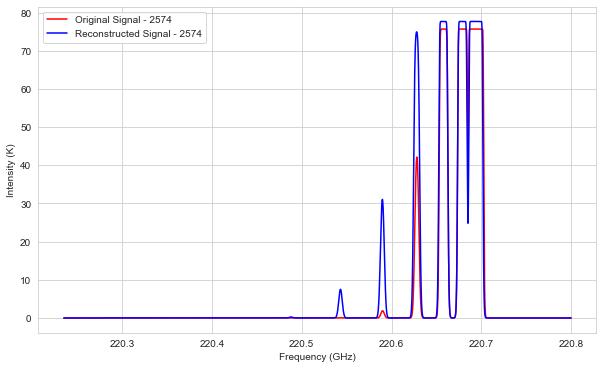

In [32]:
# plot the signal in one plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[0],  inten_sig[0], color='r', label='Original Signal - {}'.format(signal_index[0]))
plt.plot(freq_recon[0], inten_recon[0], color='b', label='Reconstructed Signal - {}'.format(signal_index[0]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_3501.png')
plt.show()

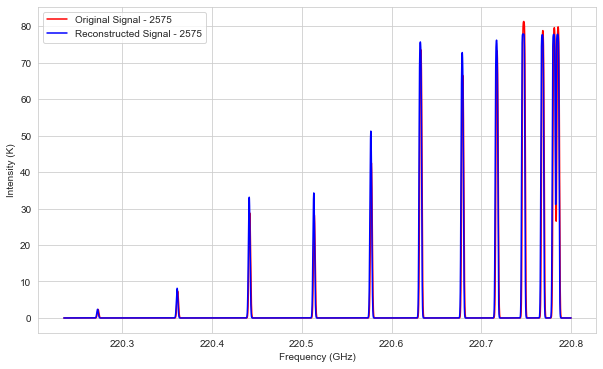

In [33]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1],  inten_sig[1], color='r', label='Original Signal - {}'.format(signal_index[1]))
plt.plot(freq_recon[1], inten_recon[1], color='b', label="Reconstructed Signal - {}".format(signal_index[1]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_3502.png')
plt.show()

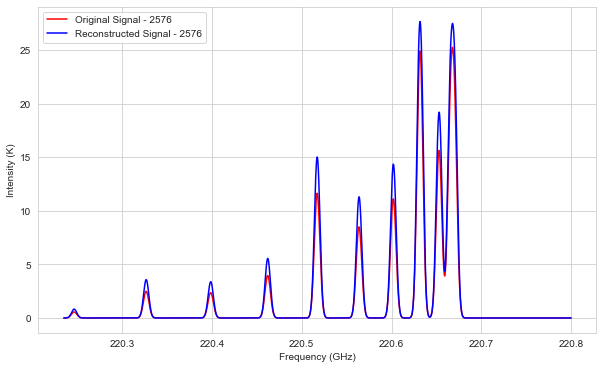

In [34]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[2],  inten_sig[2], color='r', label='Original Signal - {}'.format(signal_index[2]))
plt.plot(freq_recon[2], inten_recon[2], color='b', label="Reconstructed Signal - {}".format(signal_index[2]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_3503.png')
plt.show()

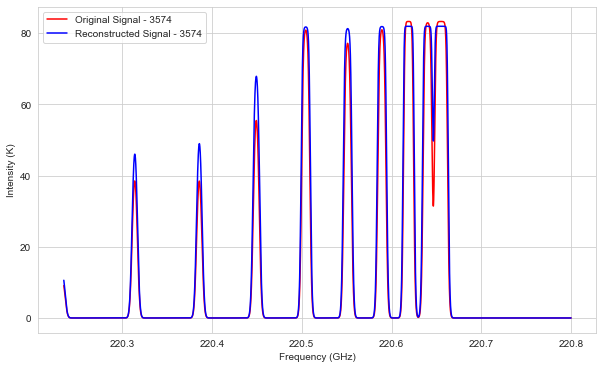

In [26]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1000],  inten_sig[1000], color='r', label='Original Signal - {}'.format(signal_index[1000]+1))
plt.plot(freq_recon[1000], inten_recon[1000], color='b', label="Reconstructed Signal - {}".format(signal_index[1000]+1))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_4500.png')
plt.show()

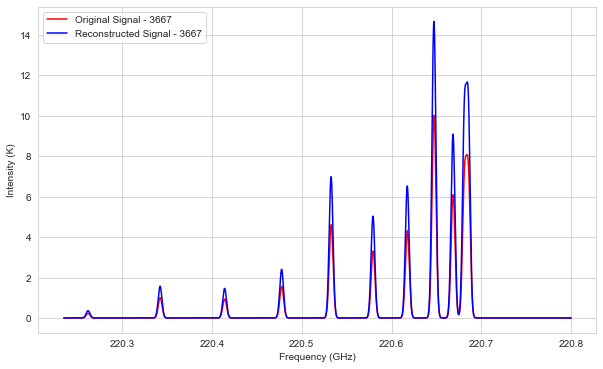

In [35]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1093],  inten_sig[1093], color='r', label='Original Signal - {}'.format(signal_index[1093]))
plt.plot(freq_recon[1093], inten_recon[1093], color='b', label="Reconstructed Signal - {}".format(signal_index[1093]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_4737.png')
plt.show()

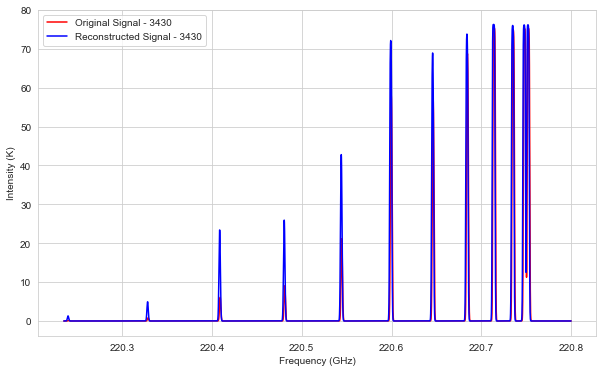

In [28]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[856],  inten_sig[856], color='r', label='Original Signal - {}'.format(signal_index[856]+1))
plt.plot(freq_recon[856], inten_recon[856], color='b', label="Reconstructed Signal - {}".format(signal_index[856]+1))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_4356.png')
plt.show()

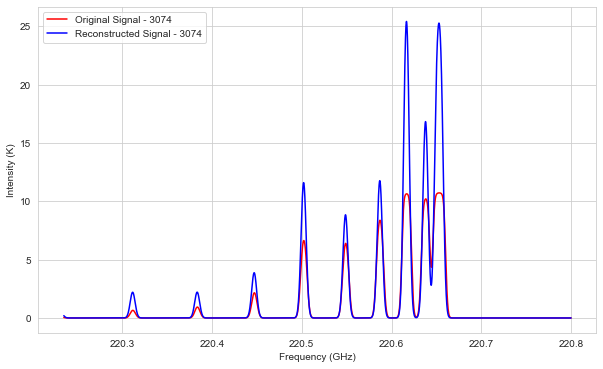

In [36]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[500],  inten_sig[500], color='r', label='Original Signal - {}'.format(signal_index[500]))
plt.plot(freq_recon[500], inten_recon[500], color='b', label="Reconstructed Signal - {}".format(signal_index[500]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_5000.png')
plt.show()

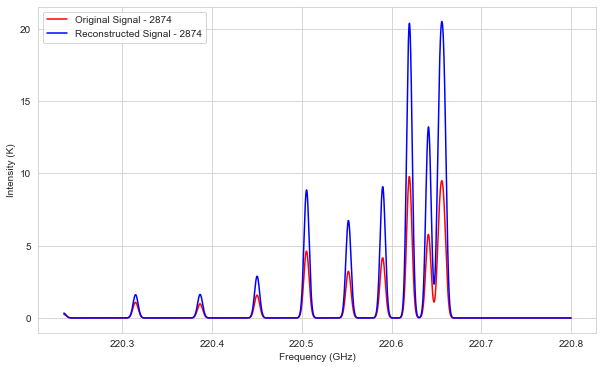

In [37]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[300],  inten_sig[300], color='r', label='Original Signal - {}'.format(signal_index[300]))
plt.plot(freq_recon[300], inten_recon[300], color='b', label="Reconstructed Signal - {}".format(signal_index[300]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_5000.png')
plt.show()

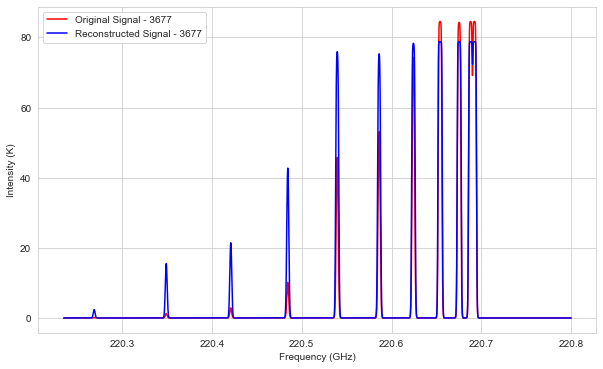

In [42]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.plot(freq_sig[1103],  inten_sig[1103], color='r', label='Original Signal - {}'.format(signal_index[1103]))
plt.plot(freq_recon[1103], inten_recon[1103], color='b', label="Reconstructed Signal - {}".format(signal_index[1103]))
plt.xlabel("Frequency (GHz)")
plt.ylabel("Intensity (K)")
plt.legend()
# plt.savefig('Recon_params/recon_5000.png')
plt.show()